In [1]:
%matplotlib inline
import psycopg2
import pandas as pd
import seaborn as sns
import numpy as np

/Users/triddle/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/triddle/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
try:
    conn = psycopg2.connect("dbname='makesense' user='postgres' host='localhost' password='Shep$1991'")
except:
    print "I am unable to connect to the database"

In [6]:
cur = conn.cursor()

In [4]:
cur.execute("""SELECT table_name FROM information_schema.tables
       WHERE table_schema = 'public'""")
for table in cur.fetchall():
    print(table)

('activities',)
('categories_projects',)
('challenges_programs',)
('challenges_tags',)
('admins',)
('cities',)
('countries',)
('categories',)
('events_programs',)
('events_participants',)
('challenges_expertises',)
('challenges_cities',)
('comments',)
('events_subscribers',)
('expertises_users',)
('notification_settings',)
('notifications',)
('identities',)
('interests',)
('pages',)
('pictures',)
('projects',)
('regions',)
('schema_migrations',)
('shares',)
('surveys',)
('team_members',)
('translations',)
('admins_regions',)
('interests_users',)
('programs',)
('feedbacks',)
('projects_tags',)
('expertises',)
('countries_regions',)
('challenges',)
('tags',)
('likes',)
('events',)
('users',)


In [7]:
sql = """Select * FROM events_participants"""
cur.execute(sql)
colnames = [desc[0] for desc in cur.description]
df_event_participants = pd.DataFrame(cur.fetchall(), columns=colnames)
df_event_participants.head()
#df_event_participants.to_csv('data/event_participants.csv', index=False)

,event_id,user_id
0,1307,2959
1,1251,2959
2,1270,2959
3,1305,2959
4,1271,2959


In [274]:
sql = """Select * FROM events"""
cur.execute(sql)
colnames = [desc[0] for desc in cur.description]
df_events = pd.DataFrame(cur.fetchall(), columns=colnames)
df_events.to_csv('data/events.csv', index=False)

In [278]:
sql = """Select * FROM users"""
cur.execute(sql)
colnames = [desc[0] for desc in cur.description]
df_users = pd.DataFrame(cur.fetchall(), columns=colnames)
df_users.to_csv('data/users.csv', index=False)

In [250]:
sns.distplot(np.log(df.sign_in_count[df.sign_in_count>0]))

AttributeError: 'DataFrame' object has no attribute 'sign_in_count'

questions for alix:
1. in the users table, what is role?
    *volunteer (10k), gangster (volunteer who organized events) (65 - might be buggy), entrepuener (5k)*
2. in users table, country is empty, except for one person, listed as portugal 
    *incomplete and evolving model for capturing data. same for city*
3. in users table, provider means where they were referred to makesense from (it means how they log in - with their fb user account)
4. it seems like everyone lists their language as english, but most of the text I see looks french.
    *english is default but can't know when change was made*

5. what is the surveys table?
    *questions that are asked when people initiate challenge*
6. notifications + notifications_settings?
    *notifications_settings is boolean. correspond to email settings - one line per user. 
    notifications - kind is the type of notifications:*
7. identities table describes where people were referred from?
    * contains user id for the referring place) *
8. events programs?
    * 
9. Challenges_cities is unpopulated?
10. what is activities?
    *holds information to ddispaly on recent activities on the website*

questions about makesense:
1. difference between challenge, event, project?
    *makesense enables volunteers to get mobilized around projects of entrepeuners. each project gets held by submitting challenges. if a company makes t-shirts with renewable material. that is the project. an example challenge is how to submit a successful crowdfunding campaign. then the volunteers see that a project has a challenge, then they propose their help to solve the challenge. to do this, they hold an event (aka holdup). there are other types of events. but there are other events where people gather just because they like makesense. a program is similar to a category, but it is a sponsored category (typically by a big company).
    tracks = programs. these are sponsored
    there are challenges and events associated with these tracks*
    a given challenge can be associated with multiple tracks/programs
    cause = categories (but categories are not sponsored)*
    
2. what does an 'engaged' user look like? 
    *attending events, participating in holdups, joingin events*
    *be a facilitator (organize hold-up). takes more time and energy. (under challenges, animator_id indicates who facilitates*
    *give ideas under inspiration wall (under comments table)*
    
    *engaged entrepeneur posts challenges, projects. (on projects table, there's a boolean value for published. a project/challenge is not published if there are problems with it, as decided by an admin)*
    *entrepeneur can give feedback to participants (
3. what is a successful challenge/event/project?

roadmap:
1. what can I give you that would be most valuable?
    - descriptive analysis of who is the most engaged?
    - description of what kind of person you want to hire?
    - suggestions for types of data to collect?
    - suggestions for what kind of a/b test to run?
2. tips on how to run a/b tests?

*key performance indicator that tells us how engaged a person is.* - probably need two - one for entrepeunur and one for volunteer.
*opinion on experiment he did on the landing page*
*most events start on facebook. there are a bunch of facebook groups (around 100?). and one larger facebook group (a few thousand people)*
*access the data from facebook groups.*
*make an infographic?*

In [75]:
df['sign_in_bins'] = pd.cut(df.sign_in_count, [0, 1, 2, 3, 6, 12, 20, 800])
df['hold_up_bin'] = df.holdup_facilitated_count>0
df['event_participated_bin'] = pd.cut(df.event_participated_count, [0, 1, 10])

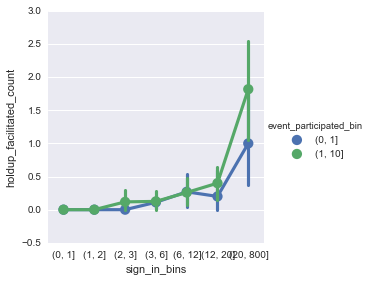

In [76]:
ax = sns.factorplot(x="sign_in_bins", y="holdup_facilitated_count", hue = 'event_participated_bin', data=df, jitter=True)

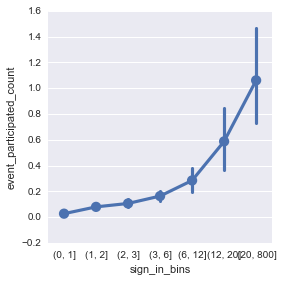

In [63]:
sns.factorplot(x="sign_in_bins", y="event_participated_count", data=df)

In [65]:
df.event_participated_count.value_counts()

0.0    15302
1.0      494
2.0       88
3.0       35
4.0       16
5.0        8
7.0        2
6.0        2
8.0        1
Name: event_participated_count, dtype: int64

In [77]:
df.sign_in_count.value_counts()

1      11243
2       1990
3        782
0        718
4        389
5        241
6        139
7        121
8         87
9         61
10        44
11        35
12        29
13        28
14        19
15        18
18        16
19        11
20         7
16         6
27         6
29         6
25         5
21         5
22         4
17         4
28         3
31         3
23         3
26         3
       ...  
32         2
30         2
46         2
24         2
34         1
33         1
41         1
40         1
89         1
39         1
47         1
51         1
42         1
50         1
142        1
78         1
62         1
701        1
61         1
37         1
68         1
60         1
52         1
36         1
55         1
35         1
234        1
82         1
58         1
71         1
Name: sign_in_count, dtype: int64

In [29]:
df.event_participated_count.value_counts()

0.0    15302
1.0      494
2.0       88
3.0       35
4.0       16
5.0        8
7.0        2
6.0        2
8.0        1
Name: event_participated_count, dtype: int64

In [80]:
pd.crosstab(df.event_participated_bin, [df.hold_up_bin, df.sign_in_bins])

hold_up_bin             False                                                  \
sign_in_bins           (0, 1] (1, 2] (2, 3] (3, 6] (6, 12] (12, 20] (20, 800]   
event_participated_bin                                                          
(0, 1]                    258    114     38     40      21        4         3   
(1, 10]                    15     19     15     29      22       13         8   

hold_up_bin             True                                                   
sign_in_bins           (0, 1] (1, 2] (2, 3] (3, 6] (6, 12] (12, 20] (20, 800]  
event_participated_bin                                                         
(0, 1]                      0      0      0      5       5        1         5  
(1, 10]                     0      0      2      3       5        7        14

other tables with interesting data:
surveys, [tags + projects_tags], projects, notifications + [notification_settings], likes + comments, interest_users+interests, events_subscribers, events [challenges * tables], activities

In [220]:
sql = """Select * FROM feedbacks"""
cur.execute(sql)
colnames = [desc[0] for desc in cur.description]

In [221]:
colnames

['id', 'challenge_id', 'body', 'created_at', 'updated_at', 'user_id']

In [222]:
df_usermap = pd.DataFrame(cur.fetchall(), columns=colnames)

In [223]:
df_usermap.head()

,id,challenge_id,body,created_at,updated_at,user_id
0,1,1022,"C'était chouette, merci à tous ! On vous envoi...",2016-02-02 10:45:14.527011,2016-02-02 10:45:14.527011,5819
1,2,990,Merci à tous les participants !,2016-02-03 17:06:31.451785,2016-02-03 17:06:31.451785,16760


In [225]:
df_usermap

,id,challenge_id,body,created_at,updated_at,user_id
0,1,1022,"C'était chouette, merci à tous ! On vous envoi...",2016-02-02 10:45:14.527011,2016-02-02 10:45:14.527011,5819
1,2,990,Merci à tous les participants !,2016-02-03 17:06:31.451785,2016-02-03 17:06:31.451785,16760


In [46]:
df_usermap.provider.value_counts()

facebook    6986
twitter       19
Name: provider, dtype: int64

notes:
- kpi: given that someone logs in, what's the probability that they engage in a key behavior?

active users are also users that read stories, and share the stories through social networks and activities.

what information needs to be tracked?
given that someone logs in, what is the probability that they click on storiess?
what's the probability that they share information?

make kpi for facebook data as well. 

see what data I can grab from facebook. How to track engagement on that website? the idea si that any changes on the makesense platform might also boost engagement on facebook.

In [10]:
import facebook
import requests
graph = facebook.GraphAPI(access_token='EAACEdEose0cBAOIsC0eTgrNMpIvqqwfijYldMSPcAHPL4EZBSok7ZCqetlAIIdCx6EAXRMR6XNRZAvv0ZCOo5umxSZB8yInfK1gk1R0yUTRkZAZBC1euuNS5LD0mP5jVr0ZCmStibD8ascaU6bLssyIqCZBXEZCYaakcHjNNdG0epb0AZDZD', 
                          version=2.2)
#make a graph object for makesense events
#events = graph.get_object('MakeSenseorg', fields='events', page=True)
#retrieve all events
#allevents = []
#event_engagement = []
#these_events = events['events']
#while(True):
#    try:
#        for event in these_events['data']:
#            allevents.append(event['id'])
#            event_engagement.append(
#                        graph.get_object(event['id'], 
#                                         fields=['attending_count, interested_count, maybe_count, noreply_count']))
#        these_events=requests.get(these_events['paging']['next']).json()
#    except KeyError:
#        break

In [11]:
graph.get_object('Makesenseorg', fields='events')

{u'events': {u'data': [{u'end_time': u'2016-12-07T21:00:00+0100',
    u'id': u'1049001901858430',
    u'location': u'iForesee',
    u'name': u'SenseDrink #9',
    u'start_time': u'2016-12-07T18:00:00+0100',
    u'timezone': u'Europe/Amsterdam'},
   {u'end_time': u'2016-12-03T18:30:00+0100',
    u'id': u'1765416763712699',
    u'location': u'Now coworking',
    u'name': u'SenseFiction Rouen - Etape Cl\xe9 de la Social Cup 2016',
    u'start_time': u'2016-12-03T14:30:00+0100',
    u'timezone': u'Europe/Paris'},
   {u'end_time': u'2016-12-03T18:30:00+0100',
    u'id': u'186091741826823',
    u'location': u'La Cantine Num\xe9rique',
    u'name': u'SenseFiction Nantes - Etape Cl\xe9 de la Social Cup 2016',
    u'start_time': u'2016-12-03T14:30:00+0100',
    u'timezone': u'Europe/Paris'},
   {u'end_time': u'2016-12-03T18:30:00+0100',
    u'id': u'155854674871167',
    u'location': u'Rivetoile Plage',
    u'name': u'SenseFiction Strasbourg - Etape Cl\xe9 de la Social Cup',
    u'start_time': 

In [153]:
import datetime
df = pd.DataFrame(event_engagement)
df['contacts'] = df.attending_count + df.interested_count+df.maybe_count+df.noreply_count
df.to_csv('fbdat.csv', index=False)


In [ ]:
import matplotlib.pyplot as plt


In [53]:
t = requests.get(events['events']['paging']['next']).json()

In [73]:
graph.get_object(allevents[51]['id'], fields=['attending_count, interested_count, maybe_count'])

{u'attending_count': 9,
 u'id': u'1082022308500634',
 u'interested_count': 5,
 u'maybe_count': 5,
 u'start_time': u'2016-08-19T19:30:00-0700'}

In [70]:
allevents[51]

{u'end_time': u'2016-08-20T21:00:00-0700',
 u'id': u'1082022308500634',
 u'location': u'Asiento',
 u'name': u'SenseDrink SanFrancisco',
 u'start_time': u'2016-08-19T19:30:00-0700',
 u'timezone': u'America/Los_Angeles'}

### Next steps
So far, I've explored the pattern of user behavior on makesense and on the primary facebook group. 

There are two options for engagement:

1. tracking the number of participants in a given event
2. tracking the number of events that occur

#### Why would the number of participants in a given event be a useful metric?
on the face of it, more participants could potentially mean more 